In [1]:
import pandas as pd

In [2]:
from pandas import Series, DataFrame

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
import missingno as msno

In [8]:
import statsmodels.api as sm

In [9]:
import statistics

In [10]:
from scipy import stats

In [11]:
import pylab

In [12]:
from pylab import rcParams

In [13]:
import sklearn

In [14]:
from sklearn import preprocessing

In [15]:
from sklearn import metrics

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.model_selection import cross_val_score, train_test_split

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
import warnings
warnings.filterwarnings('ignore')

PART III: DATA PREP

In [21]:
#Reading the csv file into Python
df = pd.read_csv('/Users/CourtneyTaylor/Downloads/churn_clean.csv')

In [22]:
#Quick overview of the data set
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [23]:
#View the columns of the data set
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [24]:
#Dropping columns we will not be using in the analysis
df= df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Churn',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Email', 'Contacts', 
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'])

In [25]:
#Checking for nulls
df.isnull().sum()

Outage_sec_perweek      0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

<AxesSubplot:>

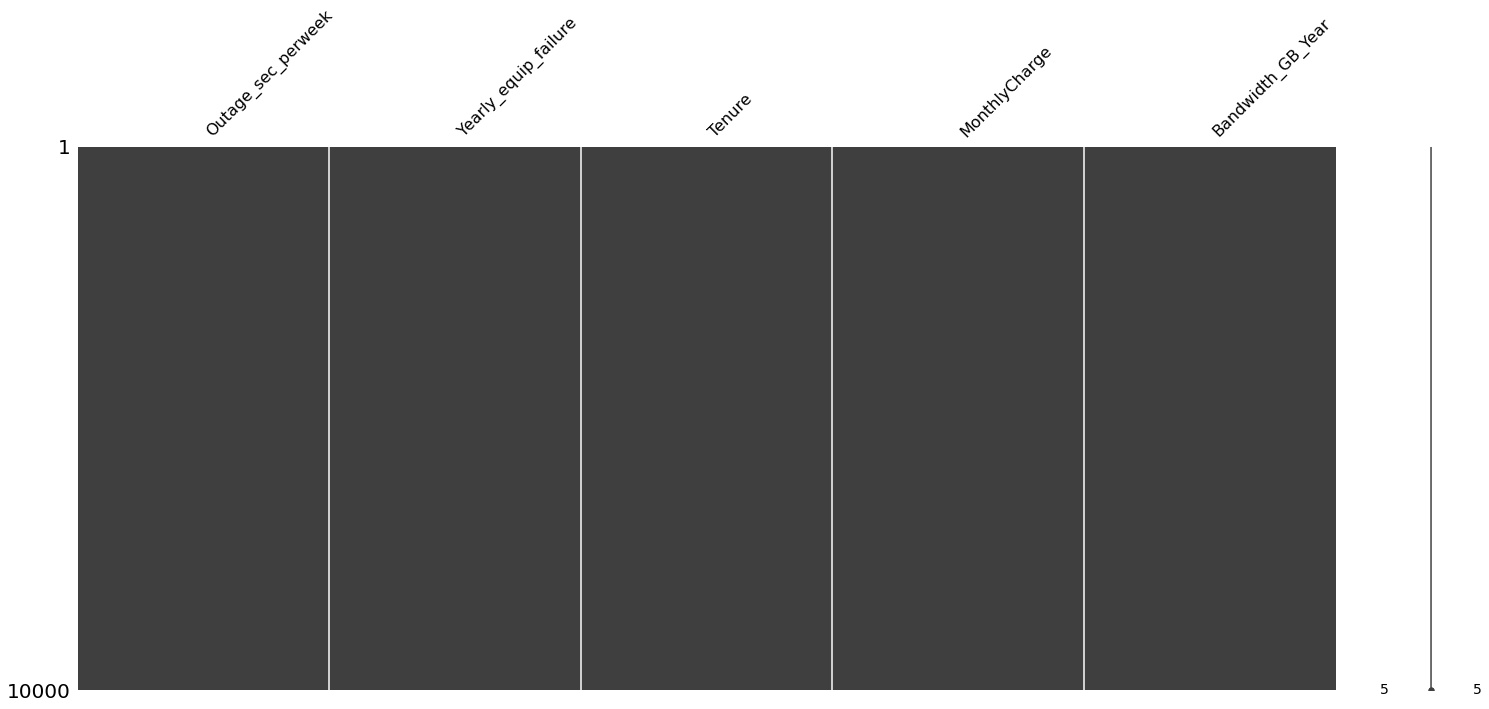

In [26]:
#Visualizing nulls
msno.matrix(df)

In [27]:
#Checking for duplicates
df.duplicated().sum()

0

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

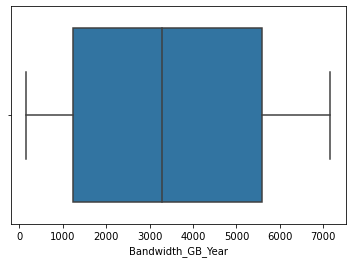

In [28]:
#Checking for outliers
sns.boxplot('Bandwidth_GB_Year', data = df)

<AxesSubplot:xlabel='MonthlyCharge'>

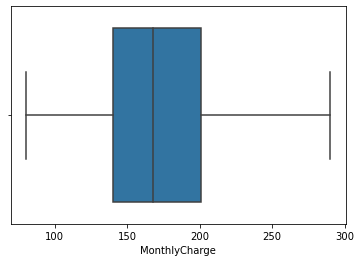

In [29]:
sns.boxplot('MonthlyCharge', data = df)

In [30]:
#Extract clean data set
df.to_csv('d209t2.csv')

In [31]:
#Load clean data set
df2 = pd.read_csv('d209t2.csv')

PART IV: ANALYSIS

In [32]:
df2.columns

Index(['Unnamed: 0', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [33]:
df2 = df2.drop(columns=['Unnamed: 0'])

In [41]:
X=df2.iloc[:, :-1]
y=df2.iloc[:, -1]

In [42]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting into test data and trained data for ridge regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor

In [43]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred)

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
h.fit(X_train, y_train)
y_pred=h.predict(X_test)
mean_squared_error(y_test, y_pred)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
#errors should be close to 0

In [ ]:
#most important variables
model_ranks = pd.Series(h.feature_importances_, index=X_train.columns, name= "Importance")
ax=model_ranks.plot(kind= 'bar')